# Interpolation

In [1]:

import numpy as np
import numpy.fft as fft
import matplotlib.pyplot as plt

On définit le facteur multiplicatif de la fréquence d'échantillonnage.

In [2]:
F = 5

In [3]:

# Liste des signaux temporels et fréquentiels
temp = []
freq = []

# Affichae
def myplot(temp, freq, Xmax):
    
    fig, axs = plt.subplots(4, 1, figsize=(16,16))
    
    # Signal temporel (trait continu)
    for (t, x, m, lbl) in temp:
        axs[0].plot(t, x, "-*", label=lbl, markersize=10)
    axs[0].set_xlabel("t (s)")
    axs[0].set_ylabel("x(t)")
    axs[0].grid()
    axs[0].legend()
    
    # Signal temporel (échantillons)
    for (t, x, m, lbl) in temp:
        axs[1].plot(t, x, label=lbl, linestyle="None", marker=m, markersize=10)
    axs[1].set_xlabel("t (s)")
    axs[1].set_ylabel("x(t)")
    axs[1].grid()
    axs[1].legend()
    
    # Module du spectre
    for (f, X, lbl) in freq:
        axs[2].plot(f, np.abs(X), label=lbl)
    axs[2].set_xlim([-Xmax, Xmax])
    axs[2].set_xlabel("f (Hz)")
    axs[2].set_ylabel("Module de X(f)")
    axs[2].grid()
    axs[2].legend()
    
    # Phase du spectre
    for (f, X, lbl) in freq:
        axs[3].plot(f, np.angle(X), label=lbl)
    axs[3].set_xlim([-Xmax, Xmax])
    axs[3].set_xlabel("f (Hz)")
    axs[3].set_ylabel("Phase de X(f)")
    axs[3].grid()
    axs[3].legend()

Le signal considéré est échantillonné à 8820 Hz :

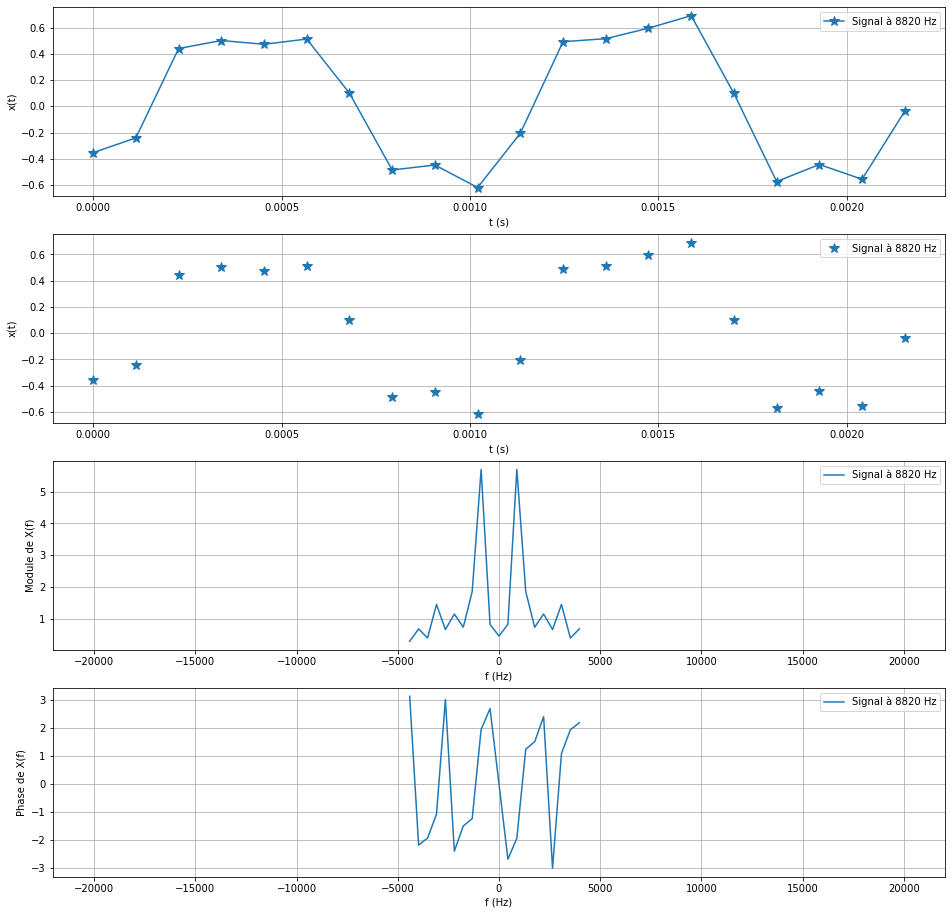

In [4]:

# Signal temporel à 8820 Hz
data = np.loadtxt("../_static/8820Hz.csv", delimiter=',')
t1 = data[:,0]
x1 = data[:,1]
Te1 = t1[1] - t1[0]
N1 = len(x1)

# Spectre
Fe1 = 1/Te1
X1 = fft.fftshift(fft.fft(x1))
k1 = np.arange(N1) - np.floor(N1/2)
f1 = k1/Te1/N1

# Affichage
label = "Signal à 8820 Hz"
temp.append([t1, x1, "*", label])
freq.append([f1, X1, label])
myplot(temp, freq, F/Te1/2)

En ajoutant des zéros du part et d'autres du spectre, de sorte à avoir un signal 5 fois plus grand, on augmente automatiquement la fréquence d'échantillonnage, tout en conservant le même contenu fréquentiel. De fait, de nouveaux échantillons apparaissent dans le signal.

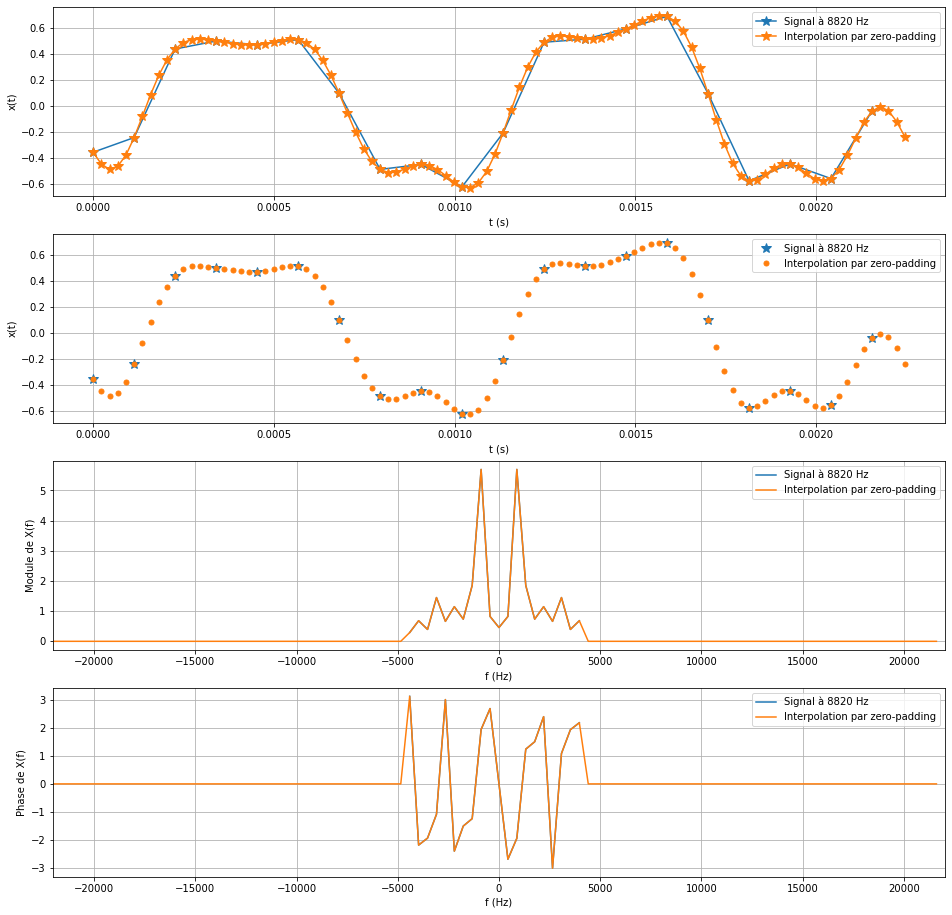

In [5]:

# Zero-padding sur la FFT

# Spectre
N2 = N1*F
Te2 = Te1/F
Nb = int((F-1)/2*N1)
X2 = np.concatenate([np.zeros(Nb), X1, np.zeros(Nb)])
k2 = np.arange(N2) - np.floor(N2/2)
f2 = k2/Te2/N2

# Signal temporel
x2 = np.real(fft.ifft(fft.fftshift(X2)))*F
t2 = np.arange(N2)*Te2


# Affichage
label = "Interpolation par zero-padding"
temp.append([t2, x2, ".", label])
freq.append([f2, X2, label])
myplot(temp, freq, F/Te1/2)

On peut comparer la qualité de l'interpolation avec le signal original (échantillonné à 5 $\times$ 8820 = 44100 Hz).

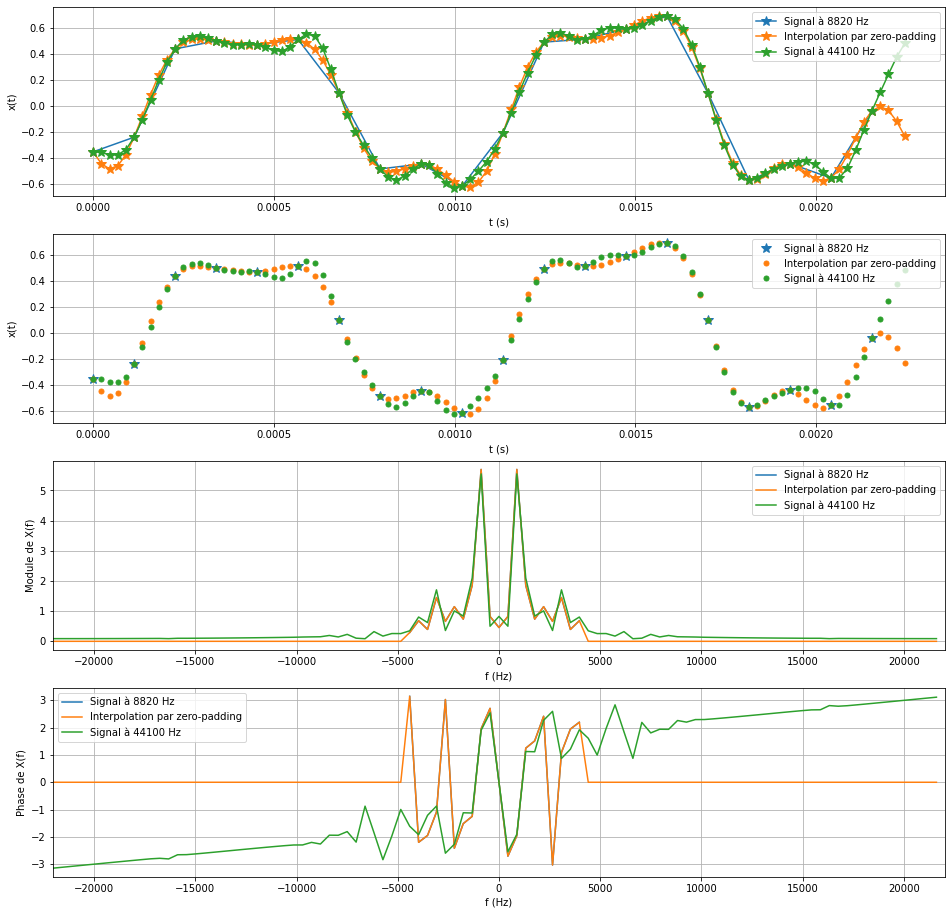

In [6]:

# Comparaison avec le signal à 44100 Hz

# Signal temporel
data = np.loadtxt("../_static/44100Hz.csv", delimiter=',', skiprows=0)
t0 = data[:,0]
x0 = data[:,1]
Te0 = t0[1] - t0[0]
N0 = len(x0)

# Spectre
Fe0 = 1/Te0
X0 = fft.fftshift(fft.fft(x0))/F
k0 = np.arange(N0) - np.floor(N0/2)
f0 = k0/Te0/N0

# Affichage
label = "Signal à 44100 Hz"
temp.append([t0, x0, ".", label])
freq.append([f0, X0, label])
myplot(temp, freq, F/Te1/2)